Importing Libraries:

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy.spatial.distance import cdist
%matplotlib inline

In [69]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [70]:
x = pd.DataFrame(iris.data,columns= iris.feature_names)
x['cluster']=iris.target


x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Raw Dataset')

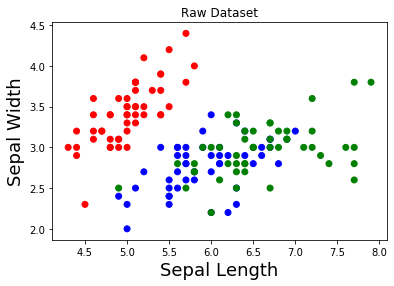

In [71]:
color = np.array(['red','blue','green'])

plt.scatter(x.iloc[:,0],x.iloc[:,1],c=color[iris.target])
plt.xlabel('Sepal Length', fontsize= 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.title("Raw Dataset")

In [72]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(x.loc[x['cluster'] == i]['sepal length (cm)'].mean())
    result_list.append(x.loc[x['cluster'] == i]['sepal width (cm)'].mean())
    
    centroids[i] = result_list
print(centroids)

{0: [5.006, 3.428], 1: [5.936, 2.7700000000000005], 2: [6.587999999999998, 2.974]}


In [73]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(x) 
    kmeanModel.fit(x)     
      
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = kmeanModel.inertia_

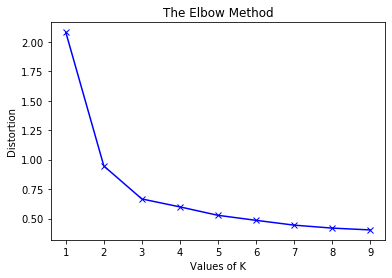

In [75]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method') 
plt.show() 

From the above plot we can see the elbow point is at k=3

In [76]:
KMeans3=KMeans(n_clusters=3)

Output_means=KMeans3.fit_predict(x)

print(Output_means)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [62]:
KMeans3.cluster_centers_

array([[6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784]])

In [ ]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=color[Output_means])
plt.xlabel('Sepal Length', fontsize= 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.title("Final Dataset")


Text(0.5, 1.0, 'Final Dataset')

Blue='Iris-versicolour'
Red='Iris-setosa'
Green='Iris-virginica'